# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Predicting Terrorism / Bayesian Inference (Mini)

Over the course of the last week, we've been investigating Bayesian methods to understand various populations. This project calls on you to apply Bayesian inference (and other tactics) to a fascinating dataset: the Global Terrorism Database.

## About the Dataset

From Kaggle:
> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2015 (with annual updates planned for the future). The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 150,000 cases. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the [University of Maryland](http://start.umd.edu/gtd/). 

> Geography: Worldwide

> Time period: 1970-2015, except 1993 (2016 in progress, publication expected June 2017)

> Unit of analysis: Attack

> Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes

> Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

> Definition of terrorism:

> "The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

You will need to make use of the [codebook](http://start.umd.edu/gtd/downloads/Codebook.pdf) that functions as a data dictionary.

Moreover, this [2007 paper by LaFree (UMD)](https://ccjs.umd.edu/sites/ccjs.umd.edu/files/pubs/FTPV_A_224594.pdf) introduces the dataset very well.

You must download the 28MB zip file, unzip it, and work with the 128MB csv on your machine.


## Goal

While there are fewer requirements of this project, the open-ended nature of the ask should force you to think about your approach and research methods. When assessing your performance on this project, we are equally interested in the method and questions you are asking as much as the implementation of those methods.

In the process of maintaining the GTD, you'll note that the year 1993 has zero recorded instances. Due to the many actors maintaining the dataset, this year has been lost.

Your goal is to impute the number of bombing/exposions that occured in 1993. (You'll note that **even we** do not have the answer. That increases our focus on your methods.)

The structure of your project must include four components: exploratory data analysis, Bayesian inference to examine the the difference in incidences across the globe, a model to impute the missing values, and a brief description of your methods. 


### Part One: EDA

You should gain an understanding of the attacks (focus on `attacktype1`), their distribution across the world, and their frequency.

You will discover different things than your classmates on this portion. Your presentation should include compelling visualizations describing terror incidents around the world.

You are **required** to produce at least one visualization that is indexed by time. For example, the number of bombings that occurred by year over time.


### Part Two: Bayesian Inference

Terror attacks are a ripe area of research for Bayesian inference. Given their infrequency, it is (thankfully) difficult for us to assume a high number of samples that approach some normal distribution.

Because of this, we should construct a prior about the amount of terror a given area has seen and update that prior with new information (like a new year of attacks or a contrasting country from within the same region). 

You should compare two populations of your choosing using Bayesian inference. We want to know if the amount of terror one area has seen differs in a significant way than another area (or time period!)

For example, if you are interested in knowing if one country in South America differs in a significant way from another area, you may make your prior  assume that some country is a country in South America with μ average attacks and σ variation across South American countries. You would then update that prior with the information of a single country in South America as well as a separate country in South America. How significantly do the resulting posteriors differ? (An important assumption made here is that the time periods are being held constant, perhaps a single year.)

You should structure your own test of populations rather than using the above example. If you're unable to setup a different test, brainstorm with your squad in the Slack chat.

You must justify the prior you selected and interpret your results (use credible intervals.) Remember you can attempt to use different priors (but don't "prior hack" to affect your output!)


### Part Three: 1993

The year 1993 is missing from our dataset! Given there is a wealth of information across different types of attacks, we will focus analysis on `attacktype1` bombings (category 3, as per the codebook)

For this section, you should determine a methodology that allows you to best fill in the missing values. Perhaps you want to consider hemispheres to be separate models, for example. (That's the only hint you'll receive - and even that hint is not an optimal option.)

Once you've created your methodology and imputed the number of bombings in 1993, you should feel free to apply your methodology to **OTHER** attack categories. (Bonus opportunity: turn your method into a pipeline. Use that pipeline to fill in other missing attack values.)


### Part Four: Methods

Please draft a max two page (or four pages double spaced) report discussing your methodology and findings. Visualizations may be included in an appendix.

Your write-up should have two parts: the Bayesian test you constructed and the values you imputed for 1993 attacks.

In your Bayesian inference section, be sure to defend your prior. Comment on your results of the differing populations.

In your missing value imputation modelling portion, justify the model or tactic you used. Bear in mind simply averaging by hemisphere can, theoretically, be a solution. Err on the side of simple and elegant rather than complex to be complex.


## Other

If you're enjoying this research (and want to go further), get in touch with Joseph. Your results can be shared with UMD START and academics. ([Gary LaFree](http://www.start.umd.edu/people/gary-lafree) or [Erin Miller](http://www.start.umd.edu/people/erin-miller))

Moreover, if you want to dig into the literature, check out [Dr. Schrodt's](http://parusanalytics.com/about.html) Bayesian approach to understanding terror.

Thank you to [Dr. Joseph Young](http://fs2.american.edu/jyoung/www/) for his thoughts on this research.




IDENTIFY THE PROBLEM

- Identify business/product objectives
- Identify and hypothesize goals and criteria for success
- Create a set of questions for identifying correct data set

ACQUIRE THE DATA

- Identify the "right" data set(s)
- Import data and set up local or remote data structure
- Determine most appropriate tools to work with data

In [31]:
import pandas as pd
import numpy as np
import pandas_profiling as pdp

In [32]:
gtd = pd.read_csv('/Users/josephlbrown/Downloads/globalterrorismdb_0616dist.csv', low_memory=False)

In [33]:
terrdata = gtd

In [34]:
type(terrdata)

pandas.core.frame.DataFrame

In [35]:
terrdata.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,ingroup,ingroup2,ingroup3,gsubname3,motive,guncertain1,guncertain2,guncertain3,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,MANO-D,NaN,NaN,NaN,NaN,3629,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,6,Hostage Taking (Kidnapping),NaN,.,NaN,.,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,23rd of September Communist League,NaN,NaN,NaN,NaN,3330,NaN,NaN,NaN,NaN,0.0,NaN,NaN,7.0,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Unknown,NaN,NaN,NaN,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,3,Bombing/Explosion,NaN,.,NaN,.,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Unknown,NaN,NaN,NaN,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,19

In [36]:
# pdp.ProfileReport(gtd) #  offers out-of-the-box statistical profiling of your dataset

PARSE THE DATA

- Read any documentation provided with the data
- Perform exploratory data analysis
- Verify the quality of the data

In [37]:
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
#     print "dataframe types \n", dataframe.dtypes
#     print "dataframe shape \n", dataframe.shape
#     print "dataframe describe \n", dataframe.describe()
#      for item in dataframe:
#         print item
#         print gtd[item].nunique()

eda(gtd)

missing values 
eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            152016
extended                   0
resolution            153270
country                    0
country_txt                0
region                     0
region_txt                 0
provstate              14520
city                     446
latitude                4519
longitude               4519
specificity                0
vicinity                   0
location              114561
summary                66140
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           132536
alternative_txt            0
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           151806
attacktype2_txt            0
attacktype3           156460
attacktype3_txt            

In [38]:
def eda(dataframe):
#     print "missing values \n", dataframe.isnull().sum()
#     print "dataframe types \n", dataframe.dtypes
#     print "dataframe shape \n", dataframe.shape
#     print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print gtd[item].nunique()

eda(gtd)

eventid
156772
iyear
45
imonth
13
iday
32
approxdate
1426
extended
2
resolution
2657
country
206
country_txt
206
region
12
region_txt
12
provstate
2509
city
31324
latitude
52021
longitude
51632
specificity
5
vicinity
3
location
35797
summary
88703
crit1
2
crit2
2
crit3
2
doubtterr
3
alternative
5
alternative_txt
6
multiple
2
success
2
suicide
2
attacktype1
9
attacktype1_txt
9
attacktype2
9
attacktype2_txt
10
attacktype3
8
attacktype3_txt
9
targtype1
22
targtype1_txt
22
targsubtype1
110
targsubtype1_txt
111
corp1
29295
target1
79947
natlty1
212
natlty1_txt
213
targtype2
22
targtype2_txt
23
targsubtype2
103
targsubtype2_txt
104
corp2
2344
target2
4562
natlty2
154
natlty2_txt
155
targtype3
20
targtype3_txt
21
targsubtype3
85
targsubtype3_txt
86
corp3
351
target3
631
natlty3
101
natlty3_txt
102
gname
3290
gsubname
992
gname2
334
gsubname2
43
gname3
77
ingroup
3290
ingroup2
334
ingroup3
77
gsubname3
6
motive
11682
guncertain1
2
guncertain2
2
guncertain3
2
nperps
113
nperpcap
50
claimed
4
cl

In [39]:
def eda(dataframe):
#     print "missing values \n", dataframe.isnull().sum()
    print "dataframe types \n", dataframe.dtypes
#     print "dataframe shape \n", dataframe.shape
#     print "dataframe describe \n", dataframe.describe()
#      for item in dataframe:
#         print item
#         print gtd[item].nunique()

eda(gtd)

dataframe types 
eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity             int64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple                int64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           f

In [40]:
def eda(dataframe):
#     print "missing values \n", dataframe.isnull().sum()
#     print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
#     print "dataframe describe \n", dataframe.describe()
#      for item in dataframe:
#         print item
#         print gtd[item].nunique()

eda(gtd)

dataframe shape 
(156772, 137)


In [41]:
def eda(dataframe):
#     print "missing values \n", dataframe.isnull().sum()
#     print "dataframe types \n", dataframe.dtypes
#     print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
#      for item in dataframe:
#         print item
#         print gtd[item].nunique()

eda(gtd)

dataframe describe 
            eventid          iyear         imonth           iday  \
count  1.567720e+05  156772.000000  156772.000000  156772.000000   
mean   2.000541e+11    2000.474083       6.484666      15.455215   
std    1.298283e+09      12.982397       3.392225       8.815533   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.989082e+11    1989.000000       4.000000       8.000000   
50%    2.005071e+11    2005.000000       6.000000      15.000000   
75%    2.013060e+11    2013.000000       9.000000      23.000000   
max    2.015123e+11    2015.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  156772.000000  156772.000000  156772.000000  152253.000000   
mean        0.041347     133.087401       6.970097      23.190988   
std         0.199091     113.946290       2.967803      19.220723   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000  

In [42]:
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000



MINE THE DATA

- Determine sampling methodology and sample data
- Format, clean, slice, and combine data in Python
- Create necessary derived colmuns from the data (new data)

In [43]:
cleaner_data = terrdata.drop(['attacktype3','attacktype2','alternative','alternative_txt','attacktype2_txt','attacktype3_txt','provstate','city','location','summary','alternative','alternative_txt','targsubtype1_txt','corp1','target1','natlty1','targtype2','targtype2_txt','targsubtype2','targsubtype2_txt','corp2','target2','natlty2','natlty2_txt','targtype3','targtype3_txt','targsubtype3','targsubtype3_txt','corp3','target3','natlty3','natlty3_txt','gsubname','gsubname2','gname3','ingroup2','motive','guncertain1','guncertain2','guncertain3','nperps','nperpcap','claimed','claimmode','claimmode_txt','claim2','claimmode2','claimmode2_txt','claim3','claimmode3','claimmode3_txt','compclaim','weapsubtype1','weapsubtype1_txt','ingroup3','gsubname3', 'guncertain3','weaptype2','weaptype2_txt','weapsubtype2','weapsubtype2_txt','weaptype3','weaptype3_txt','weapsubtype3','weapsubtype3_txt', 'weaptype4','weaptype4_txt','weapsubtype4','weapsubtype4_txt','nwoundte','propextent','propextent_txt','propvalue','propcomment','ishostkid','nhostkid','nhostkidus','nhours','ndays','divert','kidhijcountry','ransom','ransomamt','ransomamtus','ransompaid','ransompaidus','ransomnote','hostkidoutcome','hostkidoutcome_txt','nreleased','addnotes','scite1','scite2','scite3', 'divert','ransomamtus', 'ransompaid', 'ransompaidus','ransomnote'], axis=1, inplace=True)


In [44]:
cleaner_data_too = terrdata.drop(['approxdate','resolution','gname2','related', 'weaptype1_txt','crit2', 'crit3', 'extended', 'targsubtype1'], axis=1, inplace=True)

In [45]:
cleaner_data_to_the_third = terrdata.drop(['weapdetail', 'INT_LOG', 'INT_IDEO', 'INT_ANY', 'dbsource'], axis=1, inplace=True)

In [46]:
terrdata.isnull().sum()

eventid                0
iyear                  0
imonth                 0
iday                   0
country                0
country_txt            0
region                 0
region_txt             0
latitude            4519
longitude           4519
specificity            0
vicinity               0
crit1                  0
doubtterr              1
multiple               0
success                0
suicide                0
attacktype1            0
attacktype1_txt        0
targtype1              0
targtype1_txt          0
natlty1_txt            0
gname                  0
ingroup                0
weaptype1              0
nkill               8945
nkillus            64457
nkillter           66388
nwound             14200
nwoundus           64706
property               0
INT_MISC               0
dtype: int64

In [47]:
terrdata.shape

(156772, 32)

In [61]:
terrdata.head(10)

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,latitude,longitude,specificity,vicinity,crit1,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1_txt,gname,ingroup,weaptype1,nkill,nkillus,nkillter,nwound,nwoundus,property,INT_MISC
0,197000000001,1970,0,0,58,Dominican Republic,2,Central America & Caribbean,18.456792,-69.951164,1,0,1,0.0,0,1,0,1,Assassination,14,Private Citizens & Property,Dominican Republic,MANO-D,3629,13,1.0,NaN,NaN,0.0,NaN,0,0
1,197000000002,1970,0,0,130,Mexico,1,North America,19.432608,-99.133207,1,0,1,0.0,0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),Belgium,23rd of September Communist League,3330,13,0.0,NaN,NaN,0.0,NaN,0,1
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,15.478598,120.599741,4,0,1,0.0,0,1,0,1,Assassination,10,Journalists & Media,United States,Unknown,-9,13,1.0,NaN,NaN,0.0,NaN,0,1
3,197001000002,1970,1,0,78,Greece,8,Western Europe,37.983773,23.728157,1,0,1,0.0,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),United States,Unknown,-9,6,NaN,NaN,NaN,NaN,NaN,1,1
4,197001000003,1970,1,0,101,Japan,4,East Asia,33.580412,130.396361,1,0,1,-9.0,0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),United States,Unknown,-9,8,NaN,NaN,NaN,NaN,NaN,1,1
5,197001010002,1970,1,1,217,United States,1,North America,37.005105,-89.176269,1,0,1,0.0,0,1,0,2,Armed Assault,3,Police,United States,Black Nationalists,2373,5,0.0,0.0,0.0,0.0,0.0,1,0
6,197001020001,1970,1,2,218,Uruguay,3,South America,-34.891151,-56.187214,1,0,1,0.0,0,0,0,1,Assassination,3,Police,Uruguay,Tupamaros (Uruguay),623,5,0.0,NaN,NaN,0.0,NaN,0,0
7,197001020002,1970,1,2,217,United States,1,North America,37.805065,-122.273024,1,0,1,1.0,0,1,0,3,Bombing/Explosion,21,Utilities,United States,Unknown,-9,6,0.0,0.0,0.0,0.0,0.0,1,0
8,197001020003,1970,1,2,217,United States,1,North America,43.076592,-89.412488,1,0,1,0.0,0,1,0,7,Facility/Infrastructure Attack,4,Military,United States,New Year's Gang,100003,8,0.0,0.0,0.0,0.0,0.0,1,0
9,197001030001,1970,1,3,217,United States,1,North America,43.072950,-89.386694,1,0,1,0.0,0,1,0,7,Facility/Infrastructure Attack,2,Government (General),United States,New Year's Gang,100003,8,0.0,0.0,0.0,0.0,0.0,1,0


In [64]:
terrdata = terrdata[terrdata.iday != 0]

In [65]:
terrdata.shape

(155878, 32)

In [66]:
pdp.ProfileReport(terrdata) #  offers out-of-the-box statistical profiling of your dataset

Number of variables,33
Number of observations,155878
Total Missing (%),4.4%
Total size in memory,39.2 MiB
Average record size in memory,264.0 B
Numeric,25
Categorical,6
Date,0
Text (Unique),0
Rejected,2
Distinct count,3


REFINE THE DATA

- Identify trends and outliers
- Apply descriptive and inferential statistics
- Document and transform data

In [67]:
from datetime import datetime

terrdata['Date'] = terrdata.apply(lambda x: datetime(x['iyear'], x['imonth'], x['iday']), axis=1)
# Add Comment

/Users/josephlbrown/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [68]:
terrdata.to_csv("~/Desktop/cleanterrdata2.csv")


Black U.S. Terrorist Groups

In [99]:
terrdata[terrdata['gname'] == 'Black Panthers'].count()

eventid            24
iyear              24
imonth             24
iday               24
country            24
country_txt        24
region             24
region_txt         24
latitude           24
longitude          24
specificity        24
vicinity           24
crit1              24
doubtterr          24
multiple           24
success            24
suicide            24
attacktype1        24
attacktype1_txt    24
targtype1          24
targtype1_txt      24
natlty1_txt        24
gname              24
ingroup            24
weaptype1          24
nkill              24
nkillus            18
nkillter           16
nwound             24
nwoundus           18
property           24
INT_MISC           24
Date               24
dtype: int64

In [100]:
bp = terrdata[terrdata['gname'] == 'Black Panthers']

In [101]:
terrdata[terrdata['gname'] == 'Black Nationalists'].count()

eventid            89
iyear              89
imonth             89
iday               89
country            89
country_txt        89
region             89
region_txt         89
latitude           88
longitude          88
specificity        89
vicinity           89
crit1              89
doubtterr          89
multiple           89
success            89
suicide            89
attacktype1        89
attacktype1_txt    89
targtype1          89
targtype1_txt      89
natlty1_txt        89
gname              89
ingroup            89
weaptype1          89
nkill              89
nkillus            79
nkillter           79
nwound             89
nwoundus           79
property           89
INT_MISC           89
Date               89
dtype: int64

In [102]:
bn = terrdata[terrdata['gname'] == 'Black Nationalists']

In [103]:
terrdata[terrdata['gname'] == 'Black Afro Militant Movement'].count()

eventid            4
iyear              4
imonth             4
iday               4
country            4
country_txt        4
region             4
region_txt         4
latitude           4
longitude          4
specificity        4
vicinity           4
crit1              4
doubtterr          4
multiple           4
success            4
suicide            4
attacktype1        4
attacktype1_txt    4
targtype1          4
targtype1_txt      4
natlty1_txt        4
gname              4
ingroup            4
weaptype1          4
nkill              4
nkillus            4
nkillter           4
nwound             4
nwoundus           4
property           4
INT_MISC           4
Date               4
dtype: int64

In [104]:
bamm = terrdata[terrdata['gname'] == 'Black Afro Militant Movement']

In [105]:
terrdata[terrdata['gname'] == 'Black Liberation Army'].count()

eventid            36
iyear              36
imonth             36
iday               36
country            36
country_txt        36
region             36
region_txt         36
latitude           36
longitude          36
specificity        36
vicinity           36
crit1              36
doubtterr          36
multiple           36
success            36
suicide            36
attacktype1        36
attacktype1_txt    36
targtype1          36
targtype1_txt      36
natlty1_txt        36
gname              36
ingroup            36
weaptype1          36
nkill              36
nkillus            15
nkillter            9
nwound             36
nwoundus           13
property           36
INT_MISC           36
Date               36
dtype: int64

In [106]:
bla = terrdata[terrdata['gname'] == 'Black Liberation Army']

In [107]:
terrdata[terrdata['gname'] == 'Black Muslims'].count()

eventid            6
iyear              6
imonth             6
iday               6
country            6
country_txt        6
region             6
region_txt         6
latitude           6
longitude          6
specificity        6
vicinity           6
crit1              6
doubtterr          6
multiple           6
success            6
suicide            6
attacktype1        6
attacktype1_txt    6
targtype1          6
targtype1_txt      6
natlty1_txt        6
gname              6
ingroup            6
weaptype1          6
nkill              6
nkillus            4
nkillter           3
nwound             6
nwoundus           4
property           6
INT_MISC           6
Date               6
dtype: int64

In [108]:
bm = terrdata[terrdata['gname'] == 'Black Muslims']

In [109]:
terrdata[terrdata['gname'] == 'Zebra killers'].count()

eventid            20
iyear              20
imonth             20
iday               20
country            20
country_txt        20
region             20
region_txt         20
latitude           20
longitude          20
specificity        20
vicinity           20
crit1              20
doubtterr          20
multiple           20
success            20
suicide            20
attacktype1        20
attacktype1_txt    20
targtype1          20
targtype1_txt      20
natlty1_txt        20
gname              20
ingroup            20
weaptype1          20
nkill              20
nkillus            20
nkillter           20
nwound             20
nwoundus           20
property           20
INT_MISC           20
Date               20
dtype: int64

In [110]:
zk = terrdata[terrdata['gname'] == 'Zebra killers']

White U.S. Terrorist Groups

In [111]:
terrdata[terrdata['gname'] == 'Ku Klux Klan'].count()

eventid            22
iyear              22
imonth             22
iday               22
country            22
country_txt        22
region             22
region_txt         22
latitude           22
longitude          22
specificity        22
vicinity           22
crit1              22
doubtterr          22
multiple           22
success            22
suicide            22
attacktype1        22
attacktype1_txt    22
targtype1          22
targtype1_txt      22
natlty1_txt        22
gname              22
ingroup            22
weaptype1          22
nkill              22
nkillus            21
nkillter           20
nwound             21
nwoundus           20
property           22
INT_MISC           22
Date               22
dtype: int64

In [112]:
kkk = terrdata[terrdata['gname'] == 'Ku Klux Klan']

In [113]:
terrdata[terrdata['gname'] == 'White Panther Party'].count()

eventid            1
iyear              1
imonth             1
iday               1
country            1
country_txt        1
region             1
region_txt         1
latitude           1
longitude          1
specificity        1
vicinity           1
crit1              1
doubtterr          1
multiple           1
success            1
suicide            1
attacktype1        1
attacktype1_txt    1
targtype1          1
targtype1_txt      1
natlty1_txt        1
gname              1
ingroup            1
weaptype1          1
nkill              1
nkillus            1
nkillter           1
nwound             1
nwoundus           1
property           1
INT_MISC           1
Date               1
dtype: int64

In [114]:
wpp = terrdata[terrdata['gname'] == 'White Panther Party']

In [115]:
terrdata[terrdata['gname'] == 'Neo-Nazi Group'].count()

eventid            233
iyear              233
imonth             233
iday               233
country            233
country_txt        233
region             233
region_txt         233
latitude           231
longitude          231
specificity        233
vicinity           233
crit1              233
doubtterr          233
multiple           233
success            233
suicide            233
attacktype1        233
attacktype1_txt    233
targtype1          233
targtype1_txt      233
natlty1_txt        233
gname              233
ingroup            233
weaptype1          233
nkill              232
nkillus             19
nkillter            18
nwound             231
nwoundus            18
property           233
INT_MISC           233
Date               233
dtype: int64

In [116]:
nnp = terrdata[terrdata['gname'] == 'Neo-Nazi Group']

In [117]:
terrdata[terrdata['gname'] == 'White Extremists'].count()

eventid            66
iyear              66
imonth             66
iday               66
country            66
country_txt        66
region             66
region_txt         66
latitude           66
longitude          66
specificity        66
vicinity           66
crit1              66
doubtterr          66
multiple           66
success            66
suicide            66
attacktype1        66
attacktype1_txt    66
targtype1          66
targtype1_txt      66
natlty1_txt        66
gname              66
ingroup            66
weaptype1          66
nkill              65
nkillus            51
nkillter           51
nwound             65
nwoundus           51
property           66
INT_MISC           66
Date               66
dtype: int64

In [118]:
we = terrdata[terrdata['gname'] == 'White Extremists']

In [119]:
btg = pd.concat([bp,bn,bamm,bla,bm,zk], axis=0)#black Terrorist groups (bp = Black Panthers, bn = Black Nationalists,bamm = Black Afro Militant Movement, bla = Black Liberation Army, bm = Black Muslims, zk = Zebra killers)

In [120]:
wtg = pd.concat([kkk,wpp,nnp,we], axis=0)#white Terrorist groups (kkk = Ku Klux Klan, wpp = White Panther Party, nnp=Neo-Nazi Group,we=White Extremists)

In [204]:
btg.head(1000)

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,latitude,longitude,specificity,vicinity,crit1,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1_txt,gname,ingroup,weaptype1,nkill,nkillus,nkillter,nwound,nwoundus,property,INT_MISC,Date
146,197003220001,1970,3,22,217,United States,1,North America,40.844782,-73.864827,1,0,1,0.0,1,1,0,3,Bombing/Explosion,1,Business,United States,Black Panthers,4659,6,0.0,0.0,0.0,0.0,0.0,1,0,1970-03-22
147,197003220002,1970,3,22,217,United States,1,North America,40.844782,-73.864827,1,0,1,0.0,1,0,0,3,Bombing/Explosion,1,Business,United States,Black Panthers,4659,6,0.0,0.0,0.0,0.0,0.0,0,0,1970-03-22
148,197003220003,1970,3,22,217,United States,1,North America,40.783060,-73.971249,1,0,1,0.0,1,1,0,3,Bombing/Explosion,1,Business,United States,Black Panthers,4659,6,0.0,0.0,0.0,17.0,17.0,1,0,1970-03-22
203,197004170001,1970,4,17,217,United States,1,North America,37.805065,-122.273024,1,0,1,0.0,0,1,0,2,Armed Assault,3,Police,United States,Black Panthers,4659,5,0.0,0.0,0.0,2.0,2.0,1,0,1970-04-17
223,197004240002,1970,4,24,217,United States,1,North America,39.290555,-76.609604,1,0,1,0.0,0,1,0,2,Armed Assault,3,Police,United States,Black Panthers,4659,5,1.0,1.0,0.0,1.0,1.0,0,0,1970-04-24
280,197005130001,1970,5,13,217,United States,1,North America,41.589790,-93.615659,1,0,1,0.0,0,1,0,3,Bombing/Explosion,3,Police,United States,Black Panthers,4659,6,0.0,0.0,0.0,2.0,2.0,1,0,1970-05-13
300,197005220003,1970,5,22,217,United States,1,North America,42.025345,-93.620199,1,0,1,0.0,0,1,0,3,Bombing/Explosion,3,Police,United States,Black Panthers,4659,6,0.0,0.0,0.0,10.0,10.0,1,0,1970-05-22
307,197005280001,1970,5,28,217,United States,1,North America,38.579065,-121.491014,1,0,1,0.0,0,1,0,2,Armed Assault,3,Police,United States,Black Panthers,4659,5,1.0,NaN,NaN,0.0,NaN,0,0,1970-05-28
343,197006110003,1970,6,11,217,United States,1,North America,41.260675,-95.940469,1,0,1,0.0,0,1,0,3,Bombing/Explosion,3,Police,United States,Black Panthers,4659,6,0.0,0.0,0.0,0.0,0.0,1,0,1970-06-11
347,197006130001,1970,6,13,217,United States,1,North America,41.589790,-93.615659,1,0,1,0.0,0,1,0,3,Bombing/Explosion,1,Business,United States,Black Panthers,4659,6,0.0,0.0,0.0,20.0,20.0,1,0,1970-06-13


In [203]:
wtg.head(1000)

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,latitude,longitude,specificity,vicinity,crit1,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1_txt,gname,ingroup,weaptype1,nkill,nkillus,nkillter,nwound,nwoundus,property,INT_MISC,Date
116,197003090003,1970,3,9,217,United States,1,North America,33.836510,-86.254749,1,0,1,0.0,0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,United States,Ku Klux Klan,3027,2,0.0,0.0,0.0,0.0,0.0,1,0,1970-03-09
278,197005120002,1970,5,12,217,United States,1,North America,29.760450,-95.369784,1,0,1,0.0,0,1,0,3,Bombing/Explosion,16,Telecommunication,United States,Ku Klux Klan,3027,6,0.0,0.0,0.0,0.0,0.0,1,0,1970-05-12
547,197010090001,1970,10,9,217,United States,1,North America,29.760450,-95.369784,1,0,1,0.0,0,1,0,3,Bombing/Explosion,16,Telecommunication,United States,Ku Klux Klan,3027,6,0.0,0.0,0.0,0.0,0.0,1,0,1970-10-09
761,197103110001,1971,3,11,217,United States,1,North America,29.760450,-95.369784,1,0,1,0.0,0,1,0,3,Bombing/Explosion,14,Private Citizens & Property,United States,Ku Klux Klan,3027,6,0.0,0.0,0.0,0.0,0.0,1,0,1971-03-11
797,197104030003,1971,4,3,217,United States,1,North America,42.240880,-83.613089,1,1,1,0.0,0,1,0,6,Hostage Taking (Kidnapping),14,Private Citizens & Property,United States,Ku Klux Klan,3027,5,0.0,0.0,0.0,1.0,1.0,0,0,1971-04-03
995,197108300002,1971,8,30,217,United States,1,North America,42.636876,-83.288425,1,0,1,0.0,0,1,0,3,Bombing/Explosion,19,Transportation,United States,Ku Klux Klan,3027,6,0.0,0.0,0.0,0.0,0.0,1,0,1971-08-30
2037,197311260004,1973,11,26,217,United States,1,North America,33.996195,-85.978282,1,0,1,0.0,0,1,0,1,Assassination,14,Private Citizens & Property,United States,Ku Klux Klan,3027,5,1.0,1.0,0.0,0.0,0.0,-9,0,1973-11-26
7056,197812150009,1978,12,15,217,United States,1,North America,34.174375,-86.843454,1,0,1,0.0,0,1,0,6,Hostage Taking (Kidnapping),15,Religious Figures/Institutions,United States,Ku Klux Klan,3027,9,0.0,0.0,0.0,1.0,1.0,0,0,1978-12-15
8439,197905260007,1979,5,26,217,United States,1,North America,34.607389,-86.979767,1,0,1,0.0,0,1,0,2,Armed Assault,14,Private Citizens & Property,United States,Ku Klux Klan,3027,5,0.0,0.0,0.0,9.0,7.0,0,0,1979-05-26
9525,197911030002,1979,11,3,217,United States,1,North America,36.068994,-79.794704,1,0,1,0.0,0,1,0,2,Armed Assault,14,Private Citizens & Property,United States,Ku Klux Klan,3027,5,5.0,5.0,0.0,10.0,10.0,0,0,1979-11-03


In [205]:
pdp.ProfileReport(btg)

Number of variables,34
Number of observations,179
Total Missing (%),0.8%
Total size in memory,47.6 KiB
Average record size in memory,272.4 B
Numeric,22
Categorical,6
Date,1
Text (Unique),0
Rejected,5
Distinct count,152


In [206]:
pdp.ProfileReport(wtg)

Number of variables,34
Number of observations,322
Total Missing (%),2.2%
Total size in memory,85.6 KiB
Average record size in memory,272.2 B
Numeric,21
Categorical,6
Date,1
Text (Unique),0
Rejected,6
Distinct count,235


Terrorism's Golden Age in the United States

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

% matplotlib inline

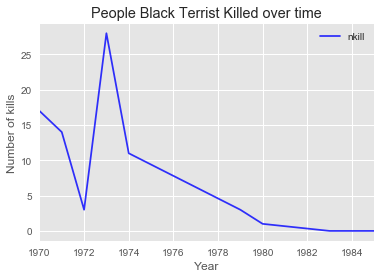

In [165]:
#And how has black terrist killings changed over time?
btg.groupby('iyear').nkill.sum().plot(kind="line", color='b', alpha=0.8)

plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Number of kills')
plt.title('People Black Terrist Killed over time')

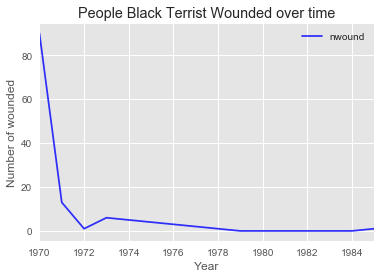

In [163]:
#And how has black terrist attacks wounded over time?
btg.groupby('iyear').nwound.sum().plot(kind="line", color='b', alpha=0.8)

plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Number of wounded')
plt.title('People Black Terrist Wounded over time')

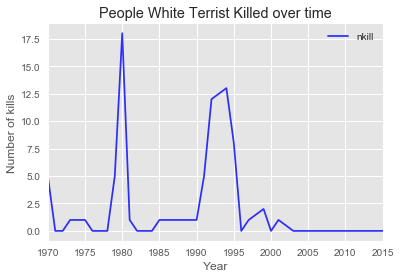

In [167]:
#And how has white terrist killings changed over time?
wtg.groupby('iyear').nkill.sum().plot(kind="line", color='b', alpha=0.8)

plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Number of kills')
plt.title('People White Terrist Killed over time')

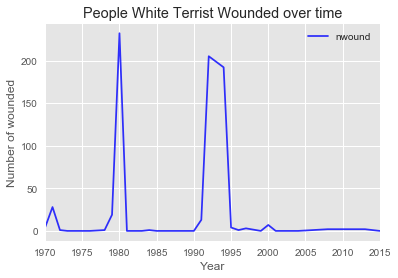

In [168]:
#And how has the use of white terrist attacks that wounded over time?
wtg.groupby('iyear').nwound.sum().plot(kind="line", color='b', alpha=0.8)

plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Number of wounded')
plt.title('People White Terrist Wounded over time')

BUILD A DATA MODEL

- Select appropriate model
- Build model
- Evaluate and refine model

In [172]:
import pymc3 as pm
import pydot

Couldn't import dot_parser, loading of dot files will not be possible.


In [173]:
#let's set up a new dataframe with US attacks(all attack are in US)
usterrdata = terrdata[(terrdata.country_txt == 'United States')]

In [174]:
#Here we set our new dataframe for our prior
usterrdata_prior = usterrdata[(usterrdata.iyear > 2000)]

In [175]:
#Here we set our group of interest
whiteterr = wtg.iyear.value_counts().values
blackterr = btg.iyear.value_counts().values

In [176]:
mean_prior_mean = usterrdata_prior.iyear.value_counts().mean()
mean_prior_std = usterrdata_prior.iyear.value_counts().std()

In [177]:
print mean_prior_mean
print mean_prior_std

20.0666666667
11.3481695608


In [189]:
with pm.Model() as model:

    blackterr_mean = pm.Normal('attacks_blackterr_mean', mean_prior_mean, sd=mean_prior_std)
    whiteterr_mean = pm.Normal('attacks_whiteterr_mean', mean_prior_mean, sd=mean_prior_std)

In [190]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    blackterr_std = pm.Uniform('attacks_blackterr_std', lower=std_prior_lower, upper=std_prior_upper)
    whiteterr_std = pm.Uniform('attacks_whiteterr_std', lower=std_prior_lower, upper=std_prior_upper)

In [191]:
with model:

    grpblackterr = pm.Normal('group_blackterr', mu=blackterr_mean, sd=blackterr_std, observed=blackterr)
    grpwhiteterr = pm.Normal('group_whiteterr', mu=whiteterr_mean,sd=whiteterr_std, observed=whiteterr)

In [192]:
with model:

    diff_of_means = pm.Deterministic('difference of means', blackterr_mean - whiteterr_mean)
    diff_of_stds = pm.Deterministic('difference of stds', blackterr_std - whiteterr_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((blackterr_std**2 + whiteterr_std**2) / 2))

In [193]:
with model:
    trace = pm.sample(10000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -192.06: 100%|██████████| 200000/200000 [00:27<00:00, 7299.28it/s]
Finished [100%]: Average ELBO = -192.07
100%|██████████| 10000/10000 [00:32<00:00, 309.50it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x14ff27b90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1509c5490>], dtype=object)

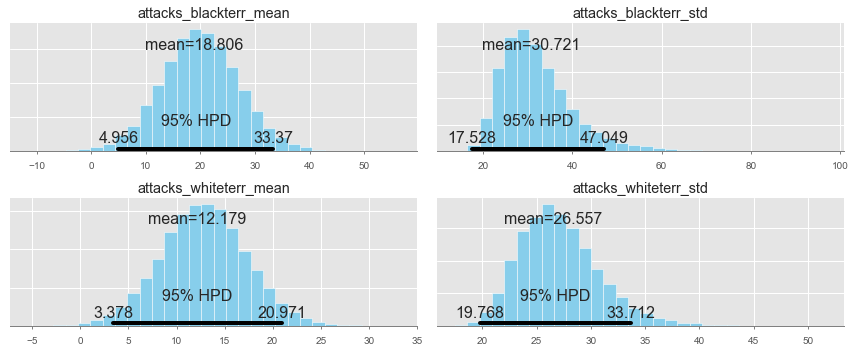

In [194]:
pm.plot_posterior(trace[3000:],
                  varnames=['attacks_blackterr_mean', 'attacks_whiteterr_mean', 'attacks_blackterr_std', 'attacks_whiteterr_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x150e3b750>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x155b21810>], dtype=object)

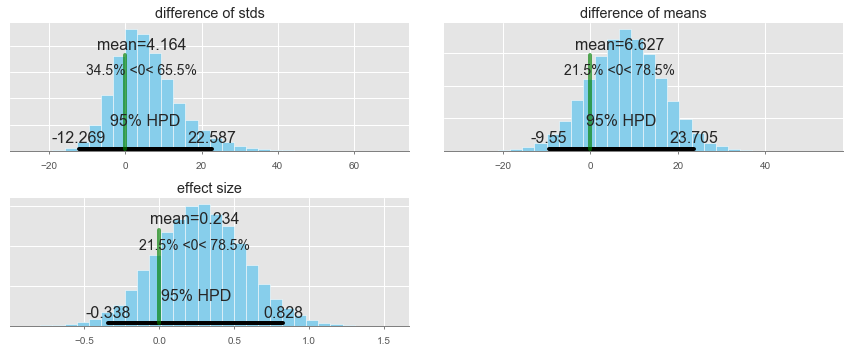

In [195]:
#so Black Terrorist Groups and White Terrist Groups are statistically different groups--which, good to confirm--and the mean effect size is 0.234
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [196]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])



difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  6.627            8.500            0.057            [-9.550, 23.705]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -10.118        0.943          6.638          12.307         23.262


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  4.164            9.044            0.077            [-12.269, 22.587]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -10.299        -1.860         3.007          8.833          25.562


effect size:

  Mean             SD               MC Error         95% 

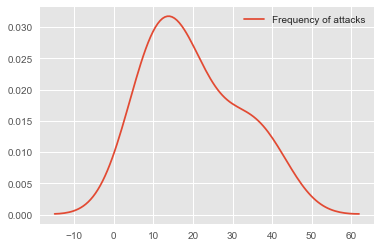

In [169]:
sns.kdeplot(usterrdata_prior.iyear.value_counts(), label='Frequency of attacks')

In [200]:
#  terrdata.groupby('gname').head()

In [ ]:
usterrdata

In [224]:
# bombterrdata only
targets_police = usterrdata.loc[usterrdata.targtype1 == 3, :]

In [225]:
targets_police.head(1000)

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,latitude,longitude,specificity,vicinity,crit1,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1_txt,gname,ingroup,weaptype1,nkill,nkillus,nkillter,nwound,nwoundus,property,INT_MISC,Date
5,197001010002,1970,1,1,217,United States,1,North America,37.005105,-89.176269,1,0,1,0.0,0,1,0,2,Armed Assault,3,Police,United States,Black Nationalists,2373,5,0.0,0.0,0.0,0.0,0.0,1,0,1970-01-01
20,197001140001,1970,1,14,217,United States,1,North America,40.116748,-88.239270,1,0,1,0.0,0,1,0,7,Facility/Infrastructure Attack,3,Police,United States,Black Nationalists,2373,8,0.0,0.0,0.0,1.0,1.0,1,0,1970-01-14
30,197001250002,1970,1,25,217,United States,1,North America,40.783060,-73.971249,1,0,1,0.0,0,1,0,2,Armed Assault,3,Police,United States,Black Nationalists,2373,5,0.0,0.0,0.0,2.0,2.0,1,0,1970-01-25
32,197001260003,1970,1,26,217,United States,1,North America,40.728224,-73.794852,1,0,1,0.0,0,1,0,2,Armed Assault,3,Police,United States,Black Nationalists,2373,5,0.0,0.0,0.0,0.0,0.0,0,0,1970-01-26
40,197001310002,1970,1,31,217,United States,1,North America,39.748783,-105.022136,1,0,1,1.0,0,1,0,3,Bombing/Explosion,3,Police,United States,Unknown,-9,6,0.0,0.0,0.0,0.0,0.0,1,0,1970-01-31
42,197002010002,1970,2,1,217,United States,1,North America,37.005105,-89.176269,1,0,1,0.0,0,1,0,2,Armed Assault,3,Police,United States,Black Nationalists,2373,5,0.0,0.0,0.0,0.0,0.0,1,0,1970-02-01
61,197002130001,1970,2,13,217,United States,1,North America,37.869885,-122.270539,1,0,1,0.0,0,1,0,3,Bombing/Explosion,3,Police,United States,Unknown,-9,6,0.0,NaN,NaN,7.0,NaN,1,0,1970-02-13
63,197002130003,1970,2,13,217,United States,1,North America,37.869885,-122.270539,1,0,1,0.0,0,1,0,3,Bombing/Explosion,3,Police,United States,Black Nationalists,2373,6,0.0,0.0,0.0,7.0,7.0,1,0,1970-02-13
66,197002160001,1970,2,16,217,United States,1,North America,37.777125,-122.419644,1,0,1,0.0,1,1,0,3,Bombing/Explosion,3,Police,United States,Unknown,-9,6,1.0,NaN,NaN,0.0,NaN,1,0,1970-02-16
69,197002160004,1970,2,16,217,United States,1,North America,37.775471,-122.403717,1,0,1,0.0,1,0,0,2,Armed Assault,3,Police,United States,Left-Wing Militants,453,5,0.0,0.0,0.0,0.0,0.0,0,0,1970-02-16


In [226]:
targets_police = targets_police.loc[targets_police.gname == 3, :]